In [6]:
!pip install pandas_datareader matplotlib seaborn

     |████████████████████████████████| 13.1MB 3.4MB/s eta 0:00:01     |██████████████████████████████▊ | 12.6MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 215kB 23.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 21.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 32.5MB/s eta 0:00:01


In [7]:
import pandas as pd
import numpy as np
from pandas_datareader import data

In [8]:
goog = data.DataReader('GOOG', start='2004', end='2018', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [9]:
goog_p = goog['Adj Close']

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

/srv/conda/envs/notebook/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/srv/conda/envs/notebook/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


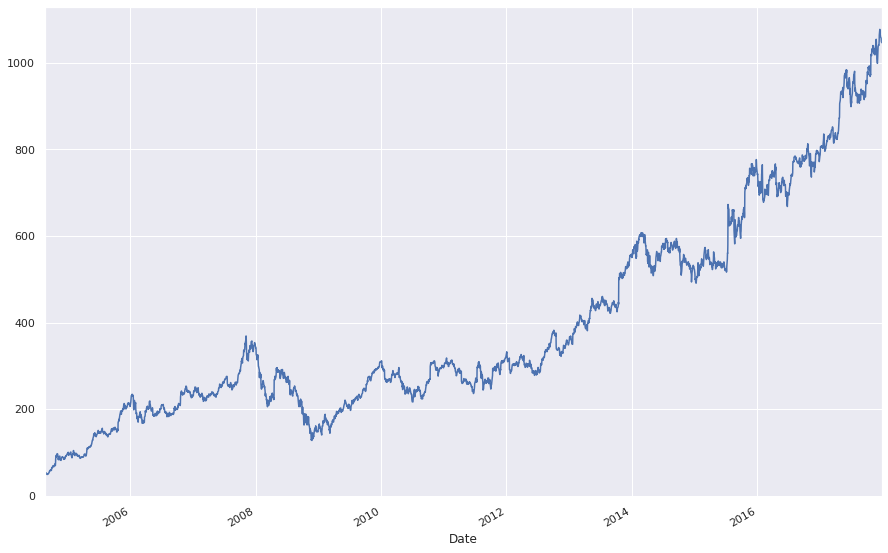

In [12]:
goog_p.plot(figsize=(15,10))

## Compute Yearly Return
A common context for financial timeseries data is computing difference over time. For example, we can calculate one-year returns using pandas.

Text(0, 0.5, '% Return on Investment')

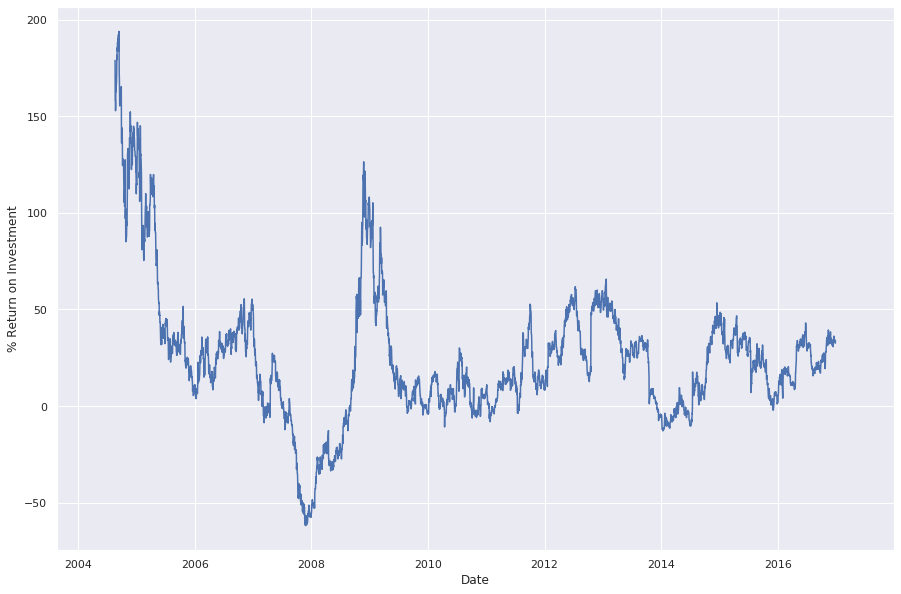

In [14]:
goog_p = goog_p.asfreq('D', method='pad')    
ROI = 100 * (goog_p.tshift(-365)/goog_p - 1)

ROI.plot(figsize=(15, 10))
plt.ylabel('% Return on Investment')

In [24]:
y1_return = goog['Adj Close'].pct_change().rolling(365).sum().dropna()
y1_vol = goog['Adj Close'].pct_change().rolling(365).std().dropna()

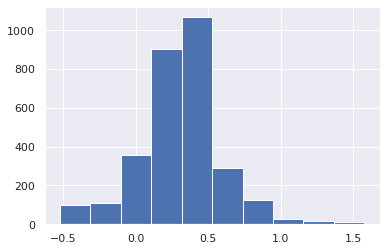

In [26]:
y1_return.hist()